Anthony Adungo Machine Learning Project.

This project leverages machine learning to develop a predictive model for early detection of breast cancer. Using a dataset of medical attributes such as tumor size, texture, and cell features, the model classifies whether a tumor is benign or malignant. The goal is to enhance diagnostic precision, reduce invasive procedures, and improve patient outcomes through data-driven insights.

The dataset used can be found at https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

# Part 1: Data Pre-processing

I) Importing the dataset and exploring its properties.

In [1]:
#Importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('breast cancer kaggle.csv')
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
125,86561,B,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,...,23.58,100.3,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182,NaN
64,85922302,M,12.68,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,...,33.47,111.8,888.3,0.1851,0.4061,0.40240,0.17160,0.3383,0.10310,NaN
272,8910988,M,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,...,28.18,195.9,2384.0,0.1272,0.4725,0.58070,0.18410,0.2833,0.08858,NaN
321,894618,M,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,...,23.03,150.2,1657.0,0.1054,0.1537,0.26060,0.14250,0.3055,0.05933,NaN
99,862548,M,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,...,30.86,109.5,826.4,0.1431,0.3026,0.31940,0.15650,0.2718,0.09353,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Finding the statistical summary of the dataset.
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
#Finding the categorical variables.
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [9]:
'''There is only one column with a categorical variable, that is the diagnosis column.'''

'There is only one column with a categorical variable, that is the diagnosis column.'

In [10]:
len(df.select_dtypes(include='object').columns)

1

In [11]:
df.select_dtypes(include=['float64','int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
len(df.select_dtypes(include=['float64','int64']).columns)

32

II) Dealing with missing values.

In [13]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

      id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  False      False        False         False           False      False   
1  False      False        False         False           False      False   
2  False      False        False         False           False      False   
3  False      False        False         False           False      False   
4  False      False        False         False           False      False   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            False             False           False                False   
1            False             False           False                False   
2            False             False           False                False   
3            False             False           False                False   
4            False             False           False                False   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0 

In [14]:
df.isnull().values.sum()

569

In [15]:
df.columns[df.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [16]:
'''There is one column with null values.'''

'There is one column with null values.'

In [17]:
#Dropping the column.
df = df.drop(columns='Unnamed: 32')

In [18]:
df.shape

(569, 32)

III) Dealing with categorical data.

In [19]:
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [20]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [21]:
'''There are only two unique values, malignant and benign.'''

'There are only two unique values, malignant and benign.'

In [22]:
# One hot encoding
dataset = pd.get_dummies(data = df, drop_first=True)
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


IV) Visualization.

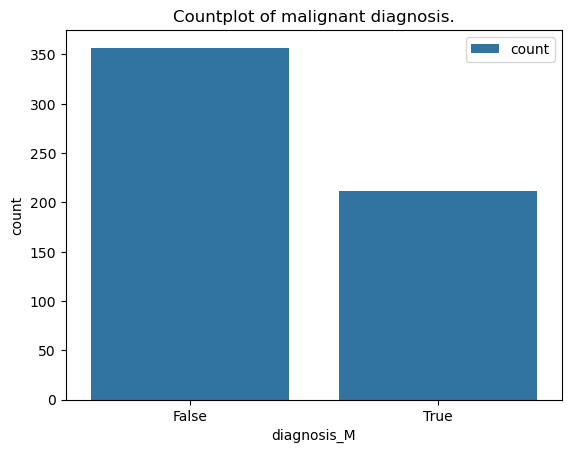

In [23]:
sns.countplot(dataset,x='diagnosis_M', label='count')
plt.title('Countplot of malignant diagnosis.')
plt.show()

In [24]:
#Count of benign values.
(dataset.diagnosis_M==0).sum()

357

In [25]:
#Count of malignant values.
(dataset.diagnosis_M==1).sum()

212

V) Correlation matrix and heatmap.

In [26]:
dataset_2 = dataset.drop(columns= 'diagnosis_M')

In [27]:
dataset_2.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


<Axes: title={'center': 'Correlation with diagnosis_M'}>

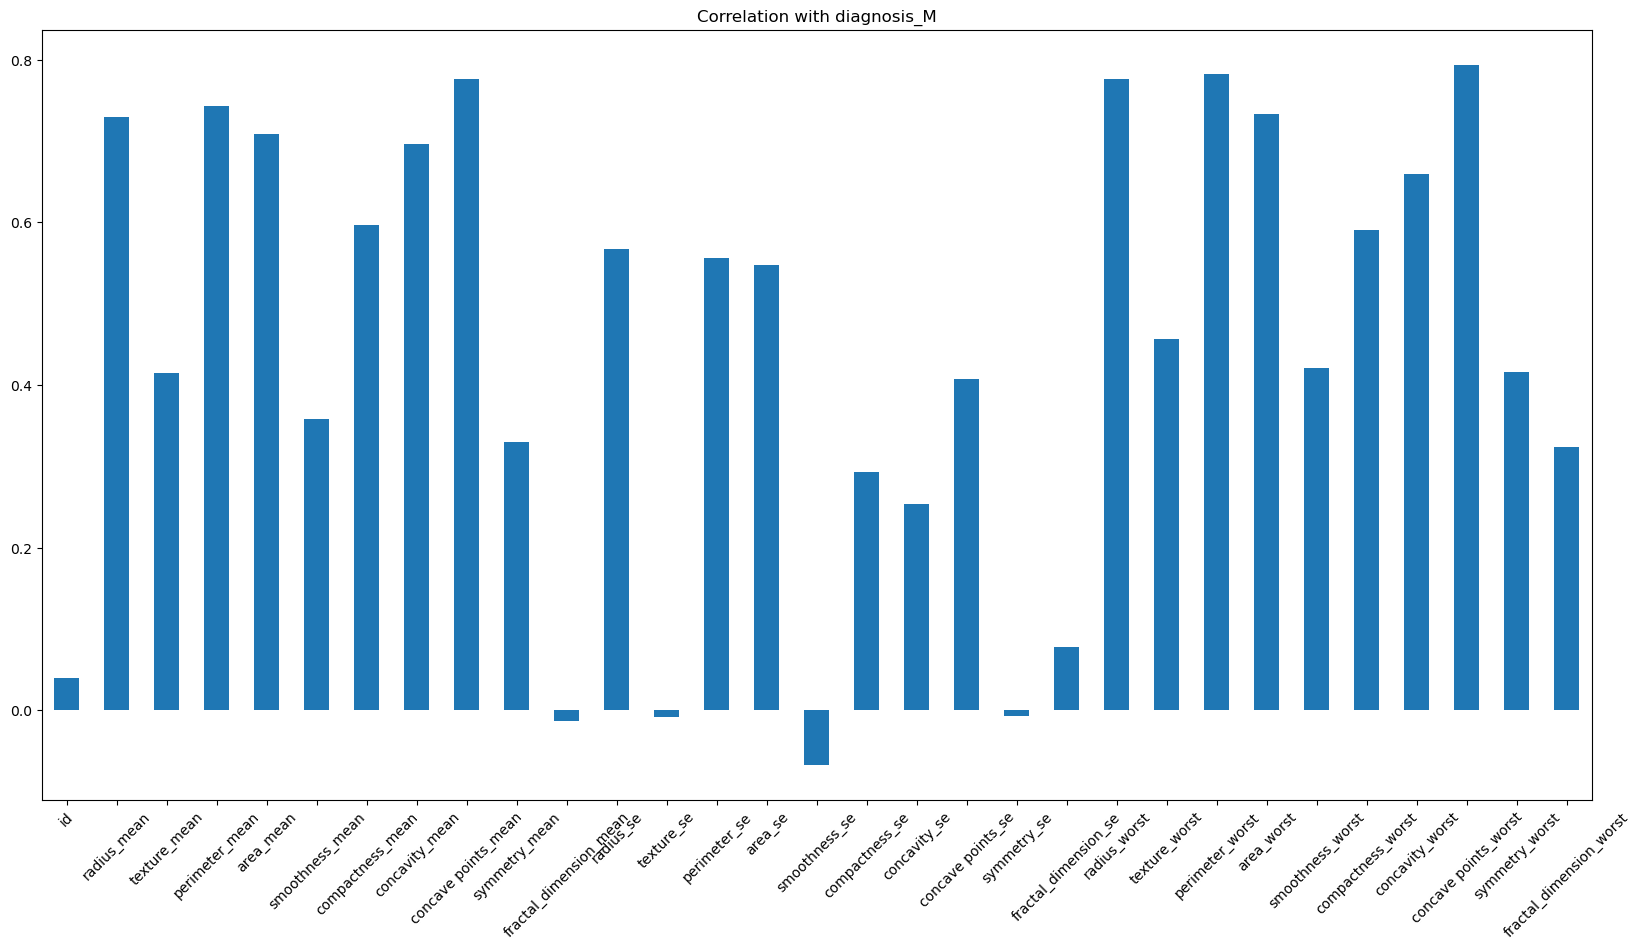

In [28]:
dataset_2.corrwith(dataset['diagnosis_M']).plot.bar(
    figsize=(20,10),
    title = 'Correlation with diagnosis_M',
    rot = 45)

In [29]:
corr = dataset.corr()

In [30]:
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


<Axes: >

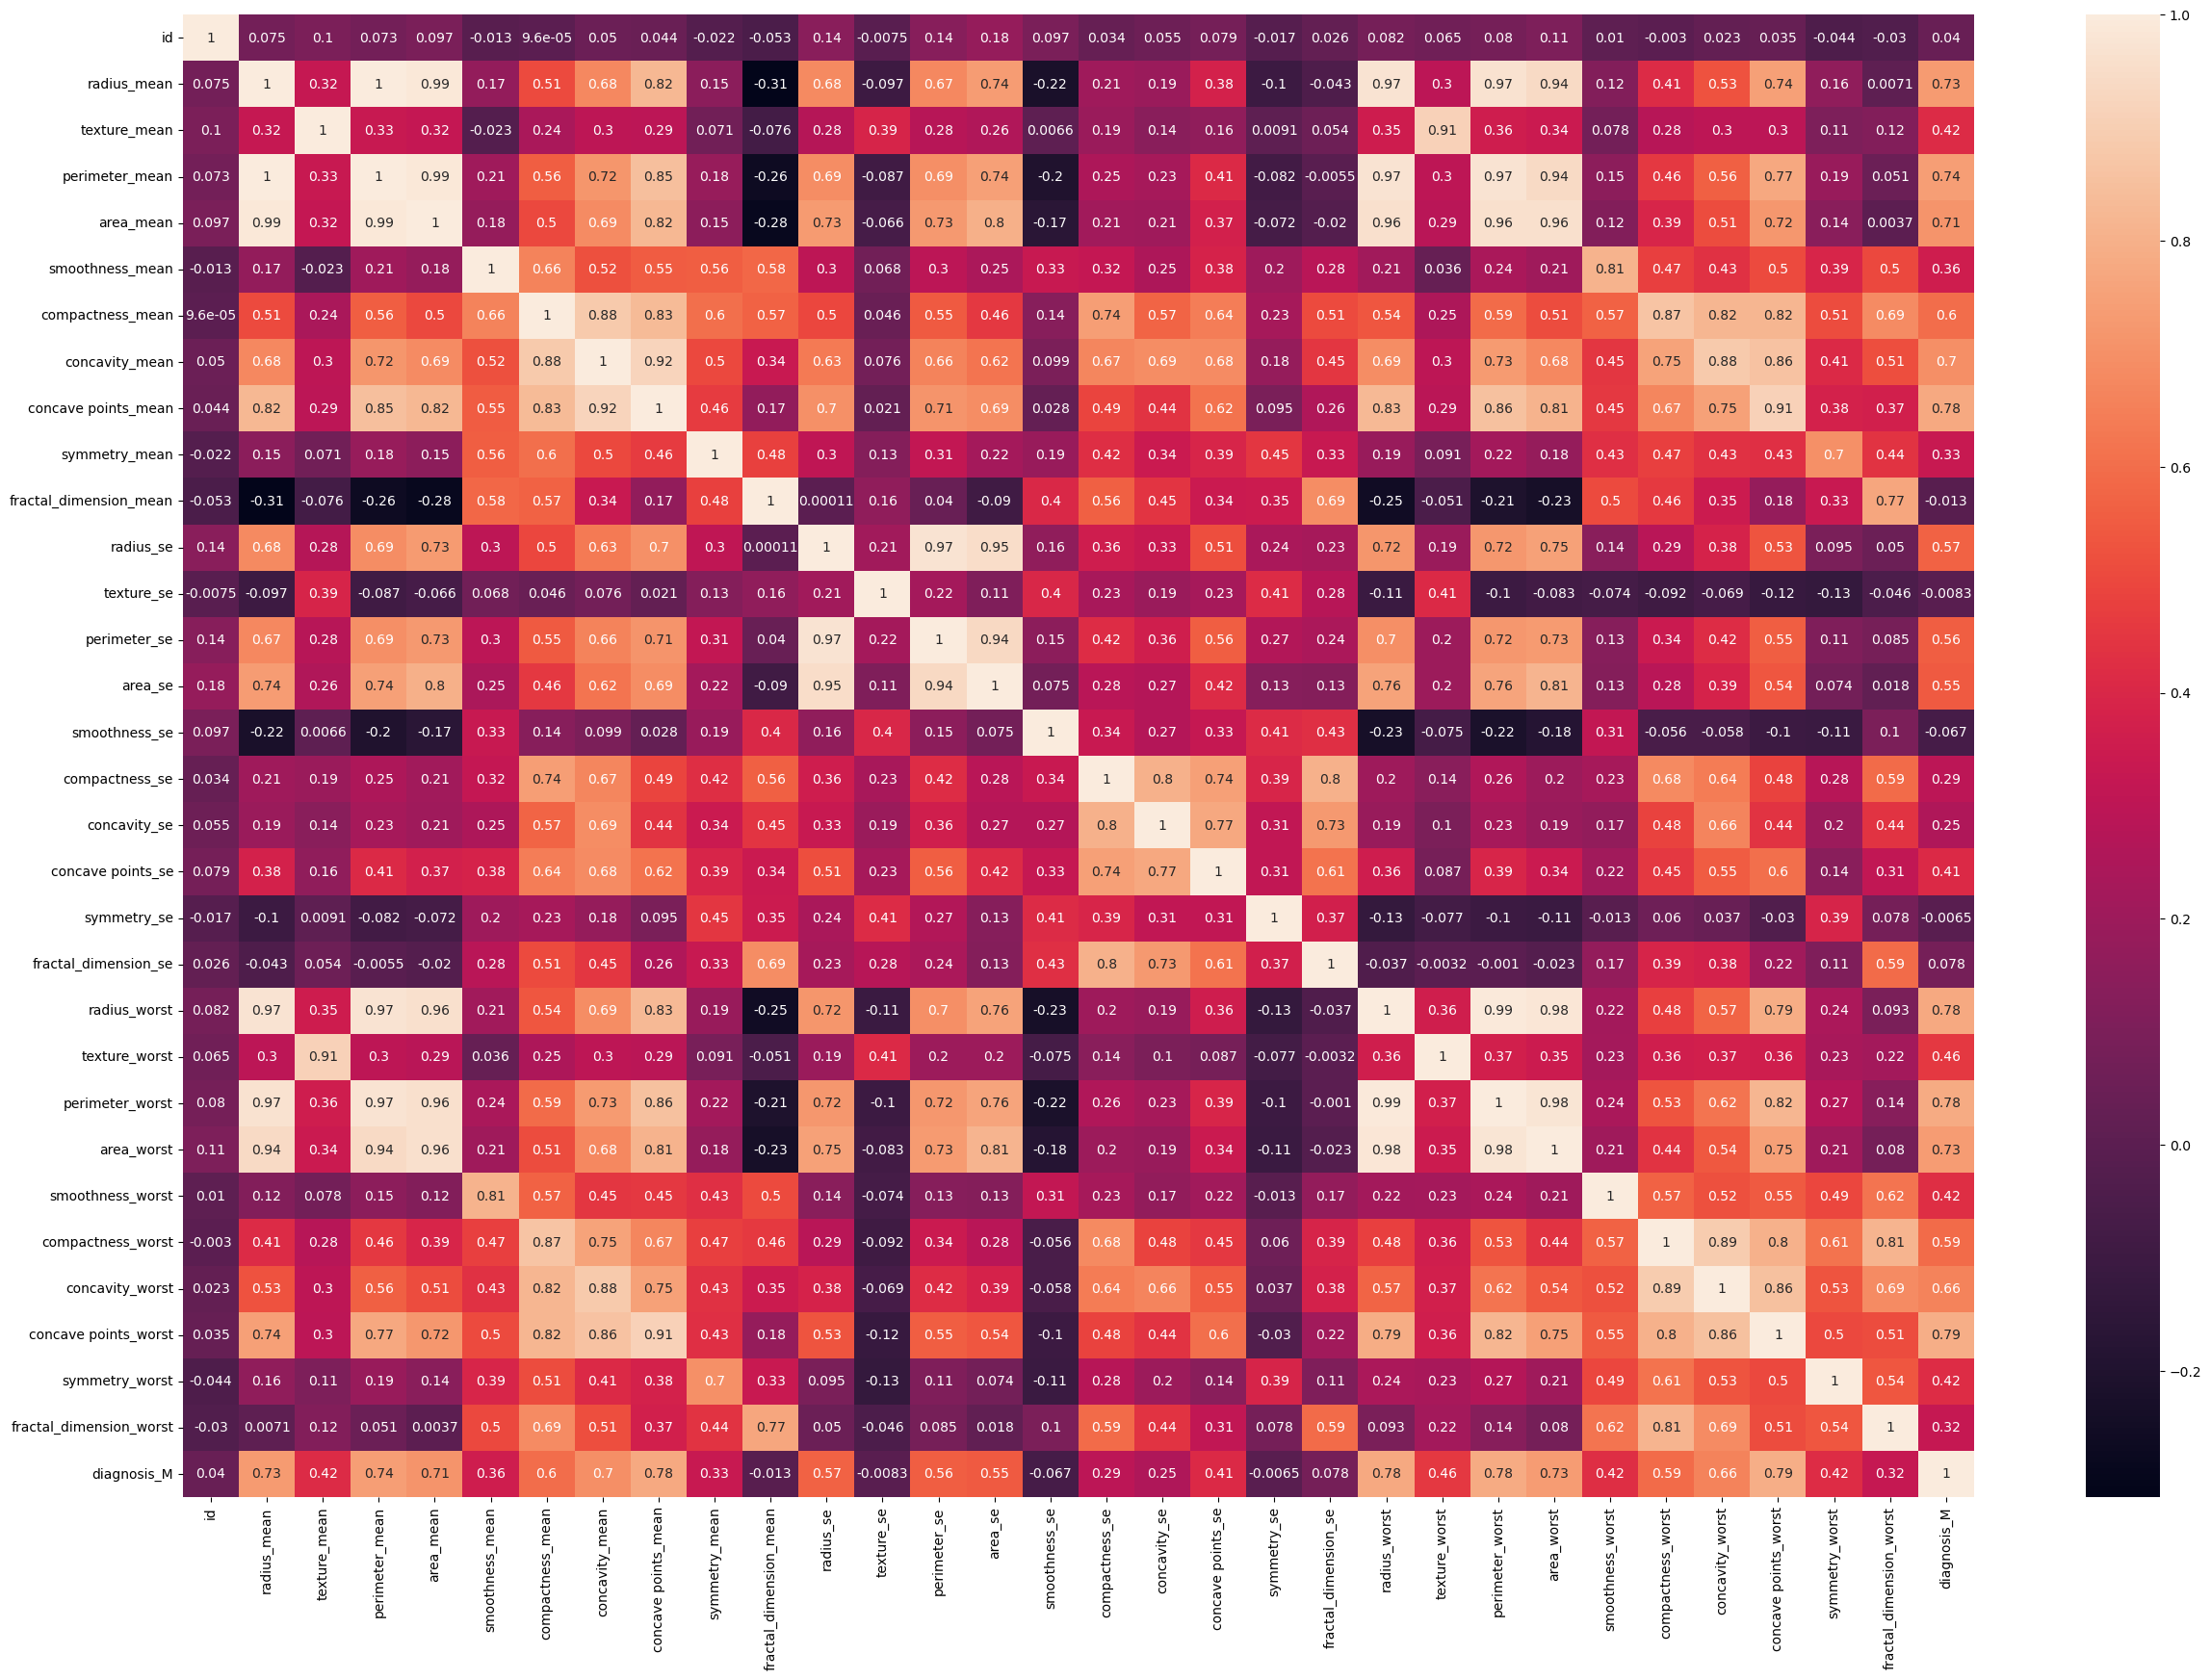

In [31]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot= True)

VI) Splitting the dataset into train and test sets.

In [32]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [33]:
#Matrix of features.
X = dataset.iloc[:,1:-1].values

In [34]:
X.shape

(569, 30)

In [35]:
#Dependent variable.
y = dataset.iloc[:,-1].values

In [36]:
y.shape

(569,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [39]:
X_train.shape

(455, 30)

In [40]:
X_test

array([[1.236e+01, 1.854e+01, 7.901e+01, ..., 8.442e-02, 2.983e-01,
        7.185e-02],
       [1.404e+01, 1.598e+01, 8.978e+01, ..., 7.453e-02, 2.725e-01,
        7.234e-02],
       [1.291e+01, 1.633e+01, 8.253e+01, ..., 8.235e-02, 3.024e-01,
        6.949e-02],
       ...,
       [1.128e+01, 1.339e+01, 7.300e+01, ..., 8.611e-02, 2.102e-01,
        6.784e-02],
       [1.487e+01, 2.021e+01, 9.612e+01, ..., 1.017e-01, 2.369e-01,
        6.599e-02],
       [1.822e+01, 1.887e+01, 1.187e+02, ..., 1.776e-01, 2.812e-01,
        8.198e-02]])

In [41]:
y_train.shape

(455,)

In [42]:
y_test

array([False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False,  True,
       False,  True,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True,  True, False, False,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True])

VII) Feature scaling.

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train

array([[ 0.02090193,  0.28562106,  0.01889271, ...,  0.28708398,
        -0.59963793, -0.32285831],
       [-0.53400124, -1.40599342, -0.51656117, ..., -0.50392051,
         0.88583908,  0.43518026],
       [-0.2551693 , -0.43868901, -0.3137073 , ..., -0.99299632,
        -0.22946024, -0.68461207],
       ...,
       [ 0.53715513,  0.08001046,  0.48846929, ...,  0.56225563,
        -0.41534346, -1.1291307 ],
       [ 1.28254744,  0.49590463,  1.24364806, ...,  1.36496632,
         1.21947563,  0.77994255],
       [-0.11437297, -0.1466285 , -0.12892951, ...,  0.20346828,
        -0.09918311,  0.32007679]])

In [47]:
X_test

array([[-0.48706913, -0.17933928, -0.519373  , ..., -0.46515324,
         0.11370878, -0.69173752],
       [-0.02326947, -0.7774792 , -0.08675198, ..., -0.61550946,
        -0.29618755, -0.66488004],
       [-0.33522996, -0.69570226, -0.37797783, ..., -0.49662314,
         0.17884735, -0.82109189],
       ...,
       [-0.78522606, -1.38262858, -0.76078919, ..., -0.43946041,
        -1.28597597, -0.91153034],
       [ 0.20586965,  0.21085357,  0.16792001, ..., -0.20244792,
        -0.86178093, -1.01293101],
       [ 1.13070827, -0.1022353 ,  1.07493791, ...,  0.95144869,
        -0.15796669, -0.13650031]])

# Part 2: Building the models.

I) Logistic Regression.

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model_lr = LogisticRegression(random_state=0)

In [50]:
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [51]:
y_pred = model_lr.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [53]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [54]:
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                       columns= ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [55]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.991228,0.987952,1.0,0.97619


In [56]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[72  0]
 [ 1 41]]


Cross Validation.

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
accuracies = cross_val_score(estimator=model_lr, X=X_train,y = y_train, cv=10)

In [59]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 97.16%
Standard deviation is 2.18%


II) Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [62]:
y_pred = classifier_rf.predict(X_test)

In [63]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [64]:
model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                       columns= ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [65]:
model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.973684,0.963855,0.97561,0.952381


In [66]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[71  1]
 [ 2 40]]


Cross Validation.

In [67]:
accuracies = cross_val_score(estimator=classifier_rf, X=X_train,y = y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 95.63%
Standard deviation is 3.23%


In [68]:
'''Based on accuracy, Logistic Regression is the best model.'''

'Based on accuracy, Logistic Regression is the best model.'

# Part 3: Using Randomized Search to find the best parameters.(Logistic Regression)

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C':[0.25,0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0],
              'solver':['newton-cg','lbfgs','liblinear', 'sag', 'saga']}

In [71]:
parameters

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [72]:
random_search = RandomizedSearchCV(estimator=model_lr, param_distributions= parameters, n_iter=10, scoring='roc_auc',n_jobs=-1, cv=10, verbose=3)

In [73]:
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [74]:
random_search.best_estimator_

LogisticRegression(C=1.5, random_state=0, solver='saga')

In [75]:
random_search.best_score_

0.9939075630252102

In [76]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 1.5}

# Part 4: Final Model.

In [77]:
model = LogisticRegression(C=1.25,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,l1_ratio=None, max_iter=100,multi_class='auto',n_jobs=None,penalty='l1',random_state=0,solver='saga',tol=0.0001,verbose=0,warm_start=False)
model.fit(X_train,y_train)

LogisticRegression(C=1.25, penalty='l1', random_state=0, solver='saga')

In [78]:
y_pred = model.predict(X_test)

In [79]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

final_model_results = pd.DataFrame([['Final Logistic Regression', acc, f1, prec, rec]],
                       columns= ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
final_model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Final Logistic Regression,0.991228,0.987952,1.0,0.97619


In [80]:
accuracies = cross_val_score(estimator=model, X=X_train,y = y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 97.16%
Standard deviation is 2.18%


# Part 5: Predicting a single observation.

In [81]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [82]:
single_obsv = [[17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760,	0.3001,	0.14710, 0.2419, 0.07871, 1.0950, 0.9053, 8.589, 153.40, 0.006399, 0.04904,	0.05373, 0.01587, 0.03003, 0.006193, 25.38,
17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890]]

In [83]:
single_obsv

[[17.99,
  10.38,
  122.8,
  1001.0,
  0.1184,
  0.2776,
  0.3001,
  0.1471,
  0.2419,
  0.07871,
  1.095,
  0.9053,
  8.589,
  153.4,
  0.006399,
  0.04904,
  0.05373,
  0.01587,
  0.03003,
  0.006193,
  25.38,
  17.33,
  184.6,
  2019.0,
  0.1622,
  0.6656,
  0.7119,
  0.2654,
  0.4601,
  0.1189]]

In [84]:
model.predict(scaler.transform(single_obsv))

array([ True])

In [85]:
'''The cancer is malignant.'''

'The cancer is malignant.'